In [1]:
from ict_eeio.mrio import (
    aggregate_sectors,
    load_base,
    get_all_industries,
    get_demand_categories,
)
from ict_eeio.industries import ict_industries
from ict_eeio.eeio import (
    get_cba_impact,
    get_pba_impact,
    get_direct_impact_coefficient,
    compute_udd_impact,
)
from ict_eeio.satellites import impact_stressors
from ict_eeio.sankey import plot_sankey
import pandas as pd
from ict_eeio.eeio import COE2_NAME


from matplotlib import pyplot as plt
import seaborn as sns

# Set seaborn theme for matplotlib
sns.set_theme()

MAX_YEAR = 2021

/Users/thibaultsimon/Documents/projects/thesis/1_eeioa/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

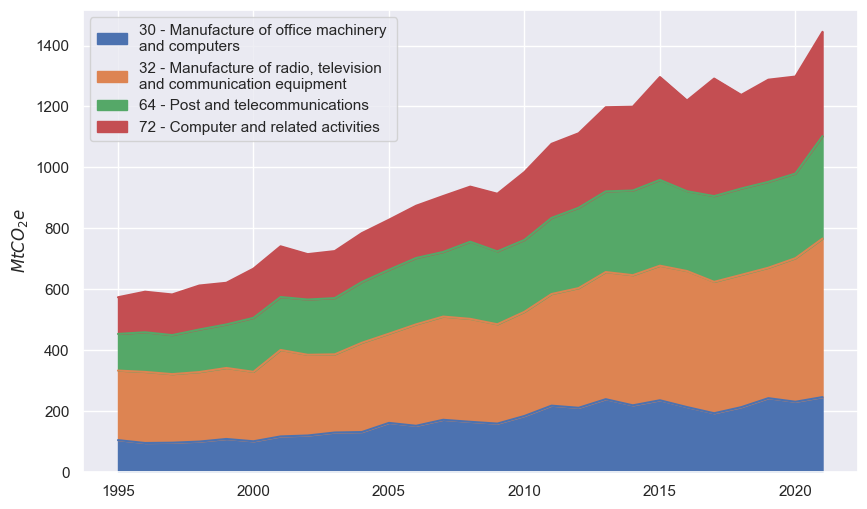

In [2]:
from ict_eeio.utils import kg_to_Gt,kg_to_Mt

clean_labels = {
    "Computer and related activities (72)": "72 - Computer and related activities",
    "Manufacture of office machinery and computers (30)": "30 - Manufacture of office machinery \nand computers",
    "Manufacture of radio, television and communication equipment and apparatus (32)": "32 - Manufacture of radio, television \nand communication equipment",
    "Post and telecommunications (64)": "64 - Post and telecommunications",
}


def clean_label(label: str) -> str:
    if label in clean_labels:
        return clean_labels[label]
    else:
        return label


cba = pd.read_csv("data/ixi/cba/" + "ICT_1995_2022" + ".csv", index_col=[0, 1])

# Rename sectors
cba = cba.rename(index=clean_labels, level=1)

# We convert all values to MtCO2e rather than kg
cba = cba.apply(kg_to_Mt)

# Filter the data to include only years up to 2021
cba = cba.loc[cba.index.get_level_values(0) <= MAX_YEAR]

plt.figure(figsize=(10, 5))

# Pivot the DataFrame to have columns as industries and index as years
pivot_df = cba[COE2_NAME].unstack()

# Plotting
pivot_df.plot.area(stacked=True, figsize=(10, 6))

plt.ylabel(r"$MtCO_{2}e$")
# plt.title("ICT industries GHG emissions (CBA)")

plt.gcf().savefig("figures/carbon_evolution.pdf", bbox_inches="tight")

<Figure size 1000x500 with 0 Axes>

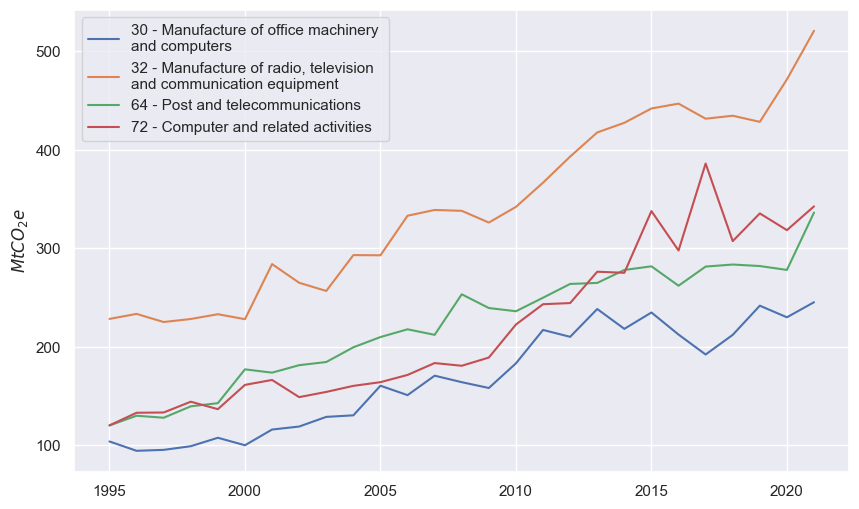

In [3]:
from ict_eeio.utils import kg_to_Gt, kg_to_Mt
import pandas as pd
import matplotlib.pyplot as plt

clean_labels = {
    "Computer and related activities (72)": "72 - Computer and related activities",
    "Manufacture of office machinery and computers (30)": "30 - Manufacture of office machinery \nand computers",
    "Manufacture of radio, television and communication equipment and apparatus (32)": "32 - Manufacture of radio, television \nand communication equipment",
    "Post and telecommunications (64)": "64 - Post and telecommunications",
}

def clean_label(label: str) -> str:
    return clean_labels.get(label, label)

# Read the data
cba = pd.read_csv("data/ixi/cba/" + "ICT_1995_2022" + ".csv", index_col=[0, 1])

# Rename sectors
cba = cba.rename(index=clean_labels, level=1)

# Convert all values to MtCO2e rather than kg
cba = cba.apply(kg_to_Mt)

# Filter the data to include only years up to 2021
cba = cba.loc[cba.index.get_level_values(0) <= MAX_YEAR]

plt.figure(figsize=(10, 5))

# Pivot the DataFrame to have columns as industries and index as years
pivot_df = cba[COE2_NAME].unstack()

# Plotting without stacking
pivot_df.plot(figsize=(10, 6))

plt.ylabel(r"$MtCO_{2}e$")
# plt.title("ICT industries GHG emissions (CBA)")

plt.gcf().savefig("figures/carbon_evolution_nonstacked.pdf", bbox_inches="tight")
